In [952]:
import numpy as np
import csv
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Define Model

$$\sigma(w,X) = \frac{1}{1 +e^{w.X}}$$

In [953]:
def sigmoid(w, X):
    return (1. / (1. + np.exp(-np.dot(X,w))))

  $$ Loss = \frac{1}{m}.[- t^{T}.\ln(\sigma(w,X)) - (1 - t^{T}).\ln(1-\sigma(w,X)] + \frac{\lambda}{2.m}.w^{T}.w$$

In [954]:
def loss(w, X, t, lam):
    m = X.shape[0]
    y = sigmoid(w,X)  
    J = (1. / m) *(- np.dot(t.T,np.log(y)) - np.dot((1. - t.T),np.log(1. - y)))
    regularizer = (lam / (2. * m)) * np.dot(w.T, w)
    J += regularizer
    return J

$$ \nabla Loss = \frac{1}{m}[(\sigma(w,X) - t)^{T}X]^T + \frac{\lambda}{m}w $$

In [955]:
def partial(w, X, t, lam):
    m = X.shape[0]
    y = sigmoid(w, X)
    d = (1. / m) * np.dot((y - t).T, X).T  
    reg = (lam / m) * w
    d = d + reg
    return d

$$w_{t+1} = w_{t} - \eta  t^{-\alpha} \nabla Loss$$

In [956]:
def update_parameter(w, d, iteration, rate = .1, a = -.9):
    w = w - rate * (iteration ** a) * d
    return w

In [957]:
#define gradient descent
def gradient_descent(w, X, t, lam, max_step = 1000, convergence = 0.00001):
    counter = 1
    L = loss(w, X, t, lam)
    L_prev = L + 10
    #update w until loss converges
    while(abs(L - L_prev) > convergence) and (counter <= max_step):
        L_prev =  L
        L = loss(w, X, t, lam)
        d = partial(w, X, t, lam)
        w = update_parameter(w, d, counter)
        counter += 1
        
    w_norm = np.linalg.norm(w)
    results = {"Weights": w, "Limit" : L, "W_norm": w_norm}
    return results
    
    

In [958]:
#find optimum lambda
def seek_lambda(X, t, stop, step_size = 1, start = 0):
    #get index lists for split
    kf = KFold(n_splits = 10)
    #find total steps within interval
    total_steps = int((stop - start) / step_size)
    lam = start
      
    results = {}
    for i in range(total_steps):
        loss_results = []
        w = np.random.random([max_features])
        #cross validate
        for train_index, test_index in kf.split(X):
            X_train, V, X_target, V_target = X[train_index, :], X[test_index, :], t[train_index], t[test_index] 
            w = gradient_descent(w, X_train, X_target, lam)["Weights"]
            validation_loss  = loss(w, V, V_target, lam)
            loss_results.append(validation_loss)
        #average the loss    
        L = np.mean(loss_results)
        results[lam] = L
        lam += step_size
    return (results)

## Fit Model using sample

In [980]:
#read in data
f = open("/Users/HAD/Desktop/Last Fall/Machine Learning/HW3/train.csv", "r", errors='ignore')
raw_data = list(csv.reader(f))[1:]
print(raw_data[0:5])

[['ham', 'Hey you can pay. With salary de. Only  &lt;#&gt; .   '], ['ham', 'What happen dear. Why you silent. I am tensed   '], ['ham', 'I can do that! I want to please you both inside and outside the bedroom...   '], ['ham', 'I wonder how you got online, my love ? Had you gone to the net cafe ? Did you get your phone recharged ? Were you on a friends net ? I think of you, boytoy   '], ['ham', 'So now my dad is gonna call after he gets out of work and ask all these crazy questions.   ']]


In [981]:
#seperate label and features
target, X = zip(*raw_data)
X =list(X)
t = np.asarray(target, dtype ="<U32")

In [982]:
#convert target to numeric
le =LabelEncoder() #get model
fit =le.fit(target) #fit model
t  = fit.transform(t) #transform

In [983]:
# convert features to numeric
max_features = 100 #define max features allowed

(3000, 100)

In [ ]:
# convert features to numeric
vectorizer = TfidfVectorizer(ngram_range = (1,2), max_features = max_features, stop_words = "english")
X  = vectorizer.fit_transform(X).toarray()
X.shape

In [984]:
# Sampling
#s = 400 #define sample size
#index =np.random.randint(1,3000,s) #random sample
#slice for prototype

#X = X[index, :]
#t = t[index]
#X.shape
#t.shape

In [989]:
test =seek_lambda(X, t, 40000)

/Users/HAD/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


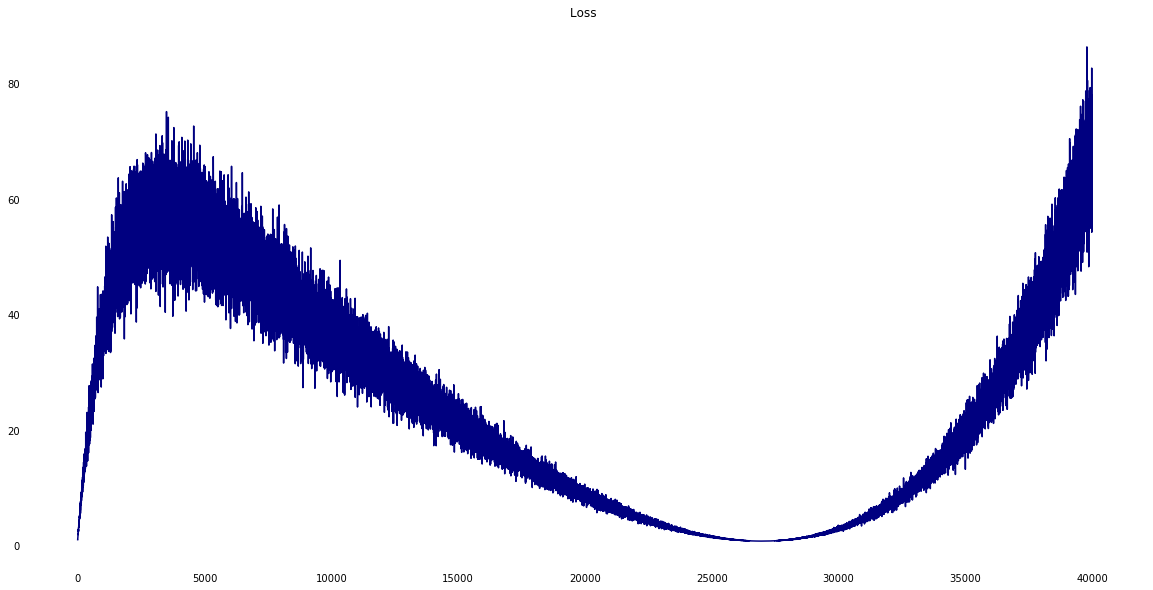

In [990]:
%matplotlib inline

x = list(test.keys())
y = list(test.values())
fig, ax1 =plt.subplots(figsize=(20,10))
ax1.plot(x, y,color='navy')
ax1.legend(loc='upper left')
ax1.tick_params(bottom='off',top='off',left='off',right='off')
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
plt.title('Loss ')
plt.show()

In [991]:
print(min(y))
print(y[0])

0.694369372466
0.938121644988
